In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df["Type"].nunique()

6

In [7]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [14]:
X=df.drop("Type",axis=1)

In [15]:
y=df["Type"]

In [16]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# wherever we have a distance in the algorithm will use the scaling
# to scale the data into same scale this scaling is required

In [20]:
# scaling

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [22]:
X_test

array([[ 0.2809482 ,  0.34135338,  0.80178174,  0.33333333,  0.56785714,
         0.33928571,  0.25096154,  0.        ,  0.21568627],
       [ 0.18261633,  0.54887218,  0.        ,  0.73831776,  0.5875    ,
         0.02380952,  0.31634615,  0.2031746 ,  0.        ],
       [ 0.45522388,  0.34887218,  0.81291759,  0.18068536,  0.44821429,
         0.11309524,  0.39038462,  0.        ,  0.33333333],
       [ 0.22300263,  0.52180451,  0.        ,  0.7788162 ,  0.65178571,
         0.02380952,  0.3125    ,  0.12698413,  0.17647059],
       [ 0.24495171,  0.38646617,  0.81069042,  0.38629283,  0.48571429,
         0.38690476,  0.21538462,  0.        ,  0.56862745],
       [ 0.72958736,  0.28721805,  0.        ,  0.11838006,  0.39464286,
         0.03571429,  0.82788462,  0.        ,  0.        ],
       [ 0.28358209,  0.31278195,  0.78841871,  0.29283489,  0.6125    ,
         0.3452381 ,  0.25      ,  0.        ,  0.        ],
       [ 0.23266023,  0.40150376,  0.77728285,  0.38317757,  0

In [23]:
def knn_tarining(X_train,y_train,X_test,K):
    '''
    X_train--> training data
    y_train--> label for the training
    X_test--> it is for the validation
    K--> it is number of the nearest neighbours
    
    '''
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    return prediction

1. how to decide the number of K
2. pros and cons of this knn

# 1. how to decide the number of K

# heuristics method=sqrt of total record==> this as a nearest neigbour
# based on reaserch= you can take different different value of the K K=1 to K=N(total number of instances)

In [24]:
import math

In [28]:
n=df.shape[0]
K=math.sqrt(n)

In [30]:
K=int(K)

In [32]:
pred=knn_tarining(X_train,y_train,X_test,K)

In [33]:
pred

array([2, 7, 1, 7, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 5, 7, 1, 2, 2, 1, 7,
       7, 7, 1, 5, 2, 1, 1, 1, 1, 2, 1, 1, 2, 7, 2, 1, 2, 2, 1, 5, 1],
      dtype=int64)

In [35]:
accuracy_score(y_test,pred)

0.5581395348837209

In [42]:
K_value=range(1,21)
accuracy=[]

for K in K_value:
    y_pred=knn_tarining(X_train,y_train,X_test,K)
    acc= accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"for this K value {K} this is my acc {acc}")

for this K value 1 this is my acc 0.7209302325581395
for this K value 2 this is my acc 0.6744186046511628
for this K value 3 this is my acc 0.6744186046511628
for this K value 4 this is my acc 0.6744186046511628
for this K value 5 this is my acc 0.6511627906976745
for this K value 6 this is my acc 0.6744186046511628
for this K value 7 this is my acc 0.6976744186046512
for this K value 8 this is my acc 0.6511627906976745
for this K value 9 this is my acc 0.627906976744186
for this K value 10 this is my acc 0.627906976744186
for this K value 11 this is my acc 0.627906976744186
for this K value 12 this is my acc 0.5581395348837209
for this K value 13 this is my acc 0.6046511627906976
for this K value 14 this is my acc 0.5581395348837209
for this K value 15 this is my acc 0.5348837209302325
for this K value 16 this is my acc 0.5581395348837209
for this K value 17 this is my acc 0.5581395348837209
for this K value 18 this is my acc 0.5581395348837209
for this K value 19 this is my acc 0.604

In [43]:
max(accuracy)

0.7209302325581395

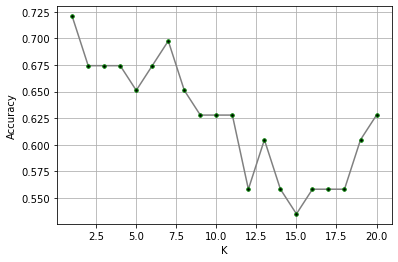

In [44]:
plt.plot(K_value,accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Pros:
Simple and easy to implement

this is effective for the low-dimesion dataset(less number of features)

in this knn we dont have the training phrase we only have the testing phase; whenever we add the new so we can add it without the training(lazy lerner)

# Cons:
not suitable for the large dataset

it is not sutaible for the higher dimession

here the reason since there is no training process everything we are doing on a distance

not sutaible for the imbalnced data

it is not sutaible for the outlier

it is not sutabile for the large scaled or data without scaling